
🔵 Training with No Normalization
Epoch 1/100 - loss: 1.4088 - accuracy: 0.4010 - val_loss: 1.2213 - val_accuracy: 0.5100
Epoch 2/100 - loss: 1.1152 - accuracy: 0.5680 - val_loss: 1.1191 - val_accuracy: 0.5700
Epoch 3/100 - loss: 1.0270 - accuracy: 0.6130 - val_loss: 1.0695 - val_accuracy: 0.5920
Epoch 4/100 - loss: 0.9717 - accuracy: 0.6335 - val_loss: 1.0443 - val_accuracy: 0.6160
Epoch 5/100 - loss: 0.9320 - accuracy: 0.6550 - val_loss: 1.0221 - val_accuracy: 0.6260
Epoch 6/100 - loss: 0.9057 - accuracy: 0.6675 - val_loss: 1.0097 - val_accuracy: 0.6240
Epoch 7/100 - loss: 0.8816 - accuracy: 0.6695 - val_loss: 1.0104 - val_accuracy: 0.6220
Epoch 8/100 - loss: 0.8653 - accuracy: 0.6800 - val_loss: 1.0001 - val_accuracy: 0.6260
Epoch 9/100 - loss: 0.8494 - accuracy: 0.6855 - val_loss: 1.0006 - val_accuracy: 0.6280
Epoch 10/100 - loss: 0.8366 - accuracy: 0.6920 - val_loss: 0.9949 - val_accuracy: 0.6260
Epoch 11/100 - loss: 0.8227 - accuracy: 0.6910 - val_loss: 0.9986 - val_accuracy: 0.6

<Figure size 1000x600 with 0 Axes>

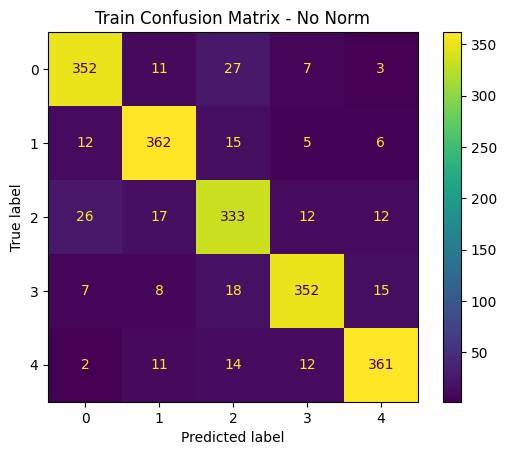


Test Confusion Matrix:


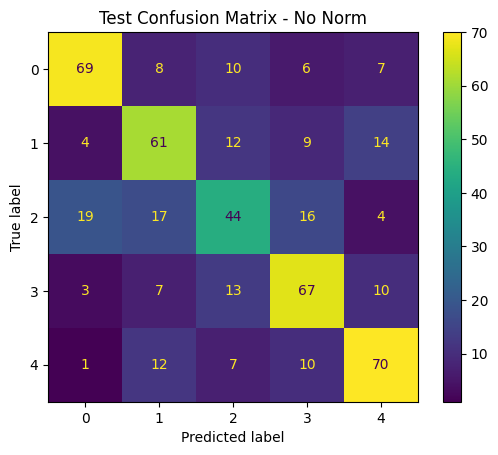


Train Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       400
           1       0.89      0.91      0.89       400
           2       0.82      0.83      0.83       400
           3       0.91      0.88      0.89       400
           4       0.91      0.90      0.91       400

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.69      0.70       100
           1       0.58      0.61      0.60       100
           2       0.51      0.44      0.47       100
           3       0.62      0.67      0.64       100
           4       0.67      0.70      0.68       100

    accuracy                           0.62       500
   macro avg       0.62      0.62      0.62       500
weighted avg      

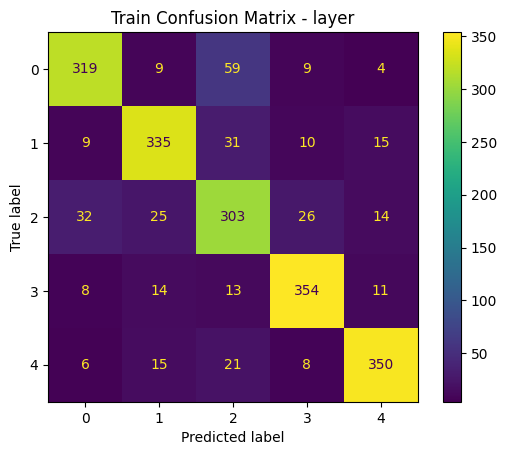


Test Confusion Matrix:


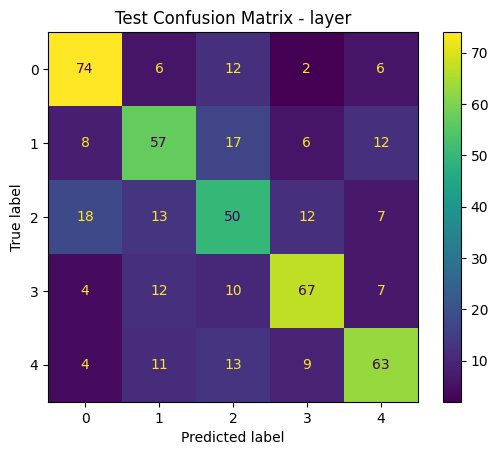


Train Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       400
           1       0.84      0.84      0.84       400
           2       0.71      0.76      0.73       400
           3       0.87      0.89      0.88       400
           4       0.89      0.88      0.88       400

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       100
           1       0.58      0.57      0.57       100
           2       0.49      0.50      0.50       100
           3       0.70      0.67      0.68       100
           4       0.66      0.63      0.65       100

    accuracy                           0.62       500
   macro avg       0.62      0.62      0.62       500
weighted avg      

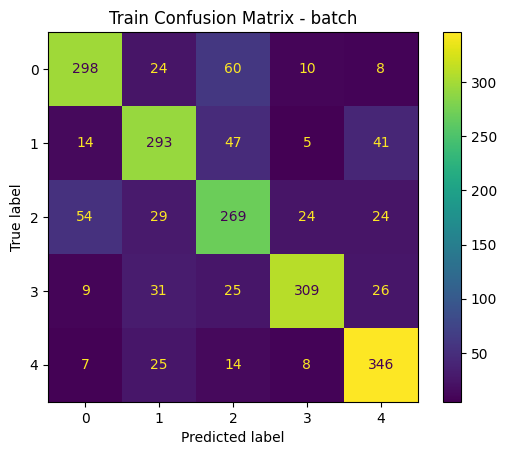


Test Confusion Matrix:


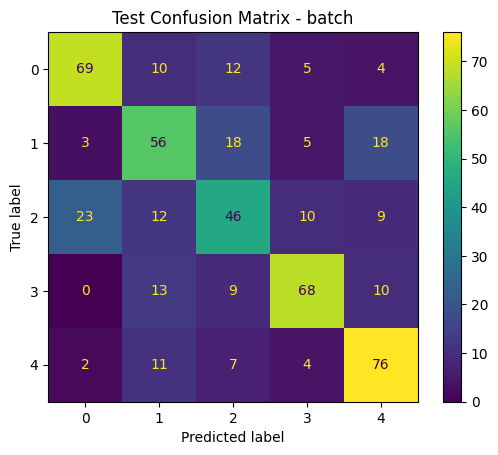


Train Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       400
           1       0.73      0.73      0.73       400
           2       0.65      0.67      0.66       400
           3       0.87      0.77      0.82       400
           4       0.78      0.86      0.82       400

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       100
           1       0.55      0.56      0.55       100
           2       0.50      0.46      0.48       100
           3       0.74      0.68      0.71       100
           4       0.65      0.76      0.70       100

    accuracy                           0.63       500
   macro avg       0.63      0.63      0.63       500
weighted avg      

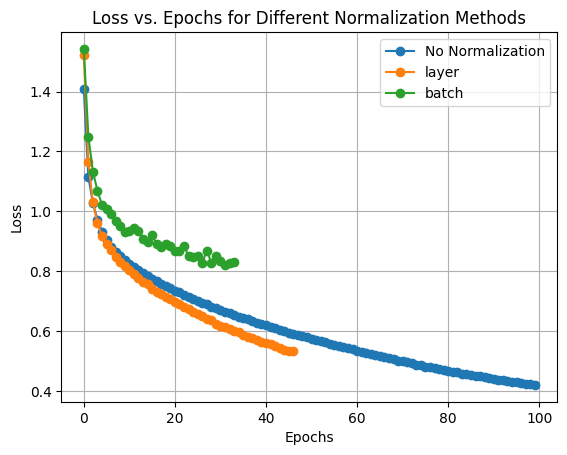


📊 Number of epochs taken for convergence:
🔹 No Normalization: 100 epochs
🔹 layer: 47 epochs
🔹 batch: 34 epochs


In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.layers import Dense, BatchNormalization, LayerNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# File paths
train_data_path = "./task2/train_data.csv"
train_label_path = "./task2/train_label.csv"
val_data_path = "./task2/val_data.csv"
val_label_path = "./task2/val_label.csv"
test_data_path = "./task2/test_data.csv"
test_label_path = "./task2/test_label.csv"

# Load datasets
train_data = pd.read_csv(train_data_path, header=None)
train_label = pd.read_csv(train_label_path, header=None)
val_data = pd.read_csv(val_data_path, header=None)
val_label = pd.read_csv(val_label_path, header=None)
test_data = pd.read_csv(test_data_path, header=None)
test_label = pd.read_csv(test_label_path, header=None)

# Convert to NumPy arrays
x_train = train_data.to_numpy()
y_train = train_label.to_numpy().flatten()
x_val = val_data.to_numpy()
y_val = val_label.to_numpy().flatten()
x_test = test_data.to_numpy()
y_test = test_label.to_numpy().flatten()

# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# One-hot encode labels
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

# Model Parameters
input_dim = x_train.shape[1]
epochs = 100
batch_size = 10
learning_rate = 0.001
stopping_threshold = 0.001  # Change in avg error to stop training

# Function to create model
def create_model(normalization=None):
    inputs = Input(shape=(input_dim,))
    x = Dense(20, activation='tanh')(inputs)
    if normalization == "batch":
        x = BatchNormalization()(x)
    elif normalization == "layer":
        x = LayerNormalization()(x)
    x = Dense(10, activation='tanh')(x)
    if normalization == "batch":
        x = BatchNormalization()(x)
    elif normalization == "layer":
        x = LayerNormalization()(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_and_evaluate(normalization=None):
    print(f"\n🔵 Training with {normalization if normalization else 'No Normalization'}")
    model = create_model(normalization)
    history = []
    prev_loss = float("inf")
    
    for epoch in range(epochs):
        hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=1, batch_size=batch_size, verbose=0)
        avg_loss = hist.history["loss"][0]
        val_loss = hist.history["val_loss"][0]
        train_acc = hist.history["accuracy"][0]
        val_acc = hist.history["val_accuracy"][0]
        history.append(avg_loss)
        
        # Print epoch update
        print(f"Epoch {epoch+1}/{epochs} - loss: {avg_loss:.4f} - accuracy: {train_acc:.4f} - val_loss: {val_loss:.4f} - val_accuracy: {val_acc:.4f}")
        
        if abs(prev_loss - avg_loss) < stopping_threshold:
            print(f"✅ Converged at epoch {epoch + 1}")
            break
        prev_loss = avg_loss
    
    # Predictions
    y_train_pred = np.argmax(model.predict(x_train), axis=1)
    y_test_pred = np.argmax(model.predict(x_test), axis=1)
    
    # Confusion matrices
    train_cm = confusion_matrix(np.argmax(y_train, axis=1), y_train_pred)
    test_cm = confusion_matrix(np.argmax(y_test, axis=1), y_test_pred)
    
    # Classification reports
    train_report = classification_report(np.argmax(y_train, axis=1), y_train_pred)
    test_report = classification_report(np.argmax(y_test, axis=1), y_test_pred)
    
    # Display and save confusion matrices
    for data_type, cm in zip(["Train", "Test"], [train_cm, test_cm]):
        print(f"\n{data_type} Confusion Matrix:")
        disp = ConfusionMatrixDisplay(cm)
        disp.plot()
        plt.title(f"{data_type} Confusion Matrix - {normalization if normalization else 'No Norm'}")
        plt.savefig(f"{data_type.lower()}_cm_{normalization if normalization else 'NoNorm'}.png", dpi=300, bbox_inches='tight')
        plt.show()
    
    # Print classification reports
    print("\nTrain Classification Report:")
    print(train_report)
    print("\nTest Classification Report:")
    print(test_report)
    
    return history, epoch + 1


# Run training for different normalization methods and store results
error_histories = {}
epochs_to_converge = {}
normalization_methods = [None, "layer", "batch"]

plt.figure(figsize=(10, 6))
for norm in normalization_methods:
    history, epochs_used = train_and_evaluate(norm)
    error_histories[norm if norm else "No Normalization"] = history
    epochs_to_converge[norm if norm else "No Normalization"] = epochs_used

# Plot loss histories
for norm, hist in error_histories.items():
    plt.plot(hist, marker='o', linestyle='-', label=norm if norm else "No Normalization")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs for Different Normalization Methods")
plt.legend()
plt.grid()
plt.savefig("comparison_loss_plot.png", dpi=300, bbox_inches='tight')
plt.show()

# Compare epochs to convergence
print("\n📊 Number of epochs taken for convergence:")
for norm, epochs_used in epochs_to_converge.items():
    print(f"🔹 {norm if norm else 'No Normalization'}: {epochs_used} epochs")
